In this project I am working on exploring the data from Stack Overflow Data - 2017 Survey results, as a part of Udacity Data Scientist nanodegree program. in order to answers the questions listed below.

#### Question 1 : What are the general demographics of the developers in the market ? 

#### Question 2: Can we use the information provided by Q1 to explore the relationship between the demographics and a developers salary? 

#### Question 3: Given the output from Q1 & Q2, How feasible is it to predict/estimate ones salary based on the provided data ?


##### before I start I'll import the libraries I might need to use for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sn
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.model_selection import GridSearchCV
import plotly.offline as pyo
from sklearn.utils import shuffle
import math
import numpy as np
import plotly.express as px
from sklearn.metrics import r2_score
import math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


### Data gathering 
##### the data I'm using is from Stack Overflow Data - 2017 Survey results, which I got from kaggle 

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/survey_results_public.csv')

### Data asessment
##### Lets explore the the data generally

In [3]:
print('Number of records:   ', df.shape[0])
print('Number of columns:   ', df.shape[1])
print('Number of duplicate records:     ',(len(df) - len(df.drop_duplicates())))
df.sample(2)

Number of records:    51392
Number of columns:    154
Number of duplicate records:      0


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
23120,23121,Professional developer,"Yes, both",Germany,"Yes, part-time",Employed part-time,Secondary school,NaN,Never,10 to 19 employees,"Privately-held limited company, not in startup...",10 to 11 years,1 to 2 years,NaN,Embedded applications/devices developer; Deskt...,NaN,NaN,NaN,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Agree,Agree,Agree,Strongly agree,Disagree,Somewhat agree,Disagree,Agree,Agree,Agree,Strongly agree,Agree,Disagree,Agree,Agree,Disagree,Somewhat agree,"I'm not actively looking, but I am open to new...",0.0,Between 1 and 2 years ago,Important,Very important,Important,Somewhat important,Very important,Very important,Important,Important,Very important,Somewhat important,Not very important,Important,Not at all important,Not very important,Somewhat important,Stock options; Vacation/days off; Equipment; E...,No,NaN,Something else,Some other way,Important,Very important,Important,Not very important,Somewhat important,Not at all important,Not very important,Important,Not at all important,Not very important,Euros (€),Somewhat underpaid,Tabs,Somewhat important,On-the-job training; Self-taught; Hackathon; O...,Stack Overflow Docs; Friends network,NaN,Take online courses; Participate in hackathons...,2:00 PM,C; C++; C#,Assembly; C; C++; C#; Python,NaN,.NET Core,NaN,NaN,Windows Desktop

### Data cleaning 
#### I'll do simple celaning for some of the features to extract better information and make it more useful for analysis, such as transforming some categorical columns into numerical, and simplifying other columns for analysis

In [4]:
# drop null rows and columns because they provide no information
df.dropna(how='all',axis=0,inplace=True)
df.dropna(how='all',axis=1,inplace=True)
df.shape


(51392, 154)

In [5]:
# transforming categorical columns to numerical
df['YearsProgram'] = pd.to_numeric(df['YearsProgram'].str.extract('(\d+)', expand=False))
df['YearsCodedJob'] = pd.to_numeric(df['YearsCodedJob'].str.extract('(\d+)', expand=False))

In [6]:
print('number of recorded genders',df['Gender'].nunique())
#simplifying the gender column for the analysis
df['Gender'][(df['Gender'] != 'Male') & (df['Gender'] != 'Female') & (df['Gender'].isna()==False) ] = 'Other'
print('number of genders after simplifying',df['Gender'].nunique())

number of recorded genders 29
number of genders after simplifying 3


### modeling 

In [7]:
df_2 = df.copy()
df_2.shape

(51392, 154)

percentage of null salary values

In [8]:
df_2['Salary'].isna().sum()/len(df_2) 

0.7491632938978829

since I'm using the salary as the target of my analysis, I'll drop the rows with null salary values
because we can see that 74% of the salary data is null , which is a huge ratio to be filled or imputed.  

In [9]:
df_2.dropna(subset=['Salary'],inplace=True)
df_2.shape

(12891, 154)

lets explore the distribution of the salary 

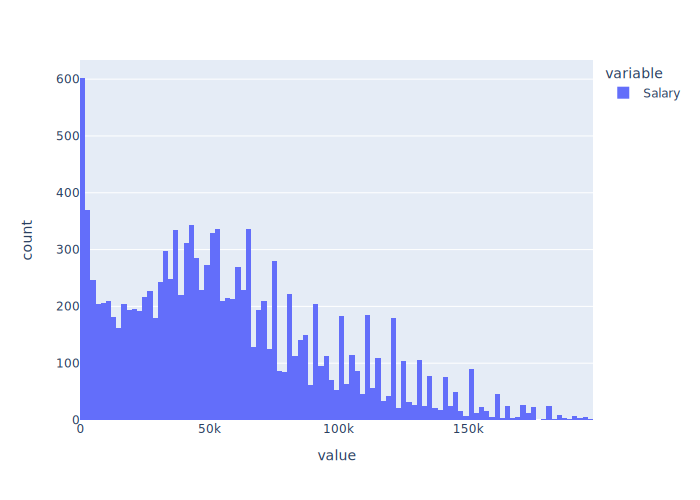

In [10]:
fig = px.histogram(df_2['Salary'])
fig.show('svg')

we still can see that the distribution of the salary field is right skewed, which means that the mean of the data is greater than the median. 

In [11]:
print(df_2['Salary'].mean())
print(df_2['Salary'].median())

56298.48064062925
50000.0


lets select the numerical columns and explore their correlation & relationship with the salary

In [12]:
df_num=df_2.select_dtypes('number')
df_num.dropna(how='all',inplace=True,axis=1) # drop empty columns that might appear after dropping empty salary
df_num.dropna(how='all',inplace=True,axis=0)
df_num.drop(columns=['Respondent'],inplace=True,axis=1)
df_num.shape

(12891, 7)

In [13]:
df_num.sample(2)

,YearsProgram,YearsCodedJob,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
10250,20.0,20.0,8.0,0.0,12.0,8.0,75000.000000
45335,2.0,NaN,7.0,8.0,1.0,9.0,1169.590643


lets handle null values in columns, by filling them with the mean

In [14]:
df_num.isna().sum()/len(df_2)

YearsProgram                 0.006749
YearsCodedJob                0.059111
CareerSatisfaction           0.002327
JobSatisfaction              0.003025
HoursPerWeek                 0.558995
StackOverflowSatisfaction    0.067799
Salary                       0.000000
dtype: float64

we can see that almost all the columns have a small percentage of their values as nulls, so it's safe for us to fill them with the mean which is better than dropping the entire row, to preserve the information of other features in our dataset

In [15]:
# Mean function
fill_mean = lambda col: col.fillna(col.dropna().mean())
# Fill the mean
df_num = df_num.apply(fill_mean, axis=0).reset_index(drop=True)

In [16]:
df_num.isna().sum()

YearsProgram                 0
YearsCodedJob                0
CareerSatisfaction           0
JobSatisfaction              0
HoursPerWeek                 0
StackOverflowSatisfaction    0
Salary                       0
dtype: int64

lets explore the distribution of the features

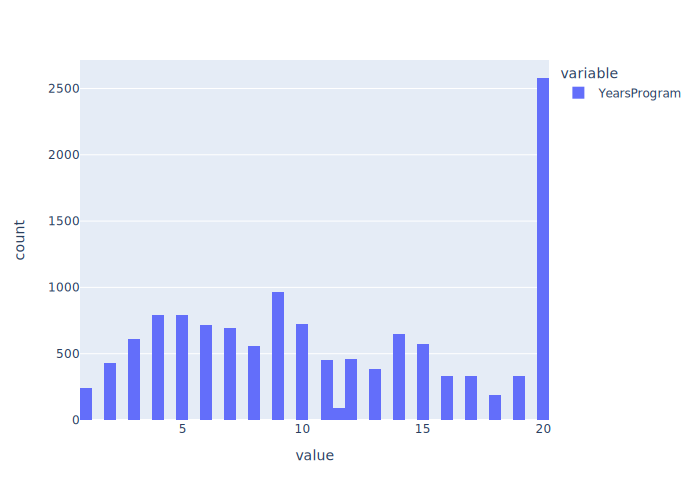

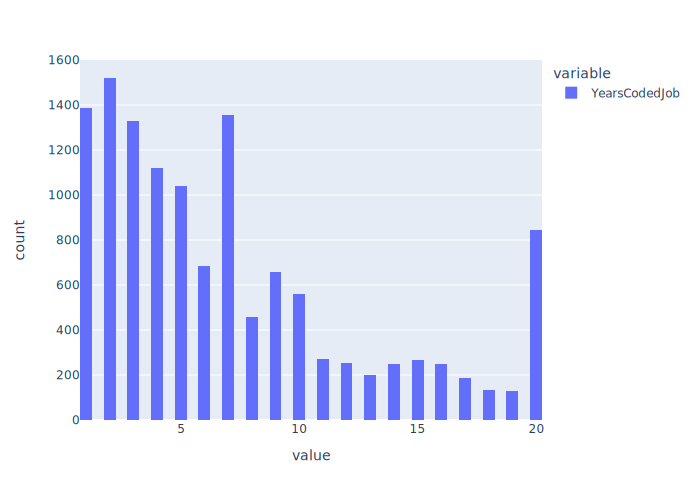

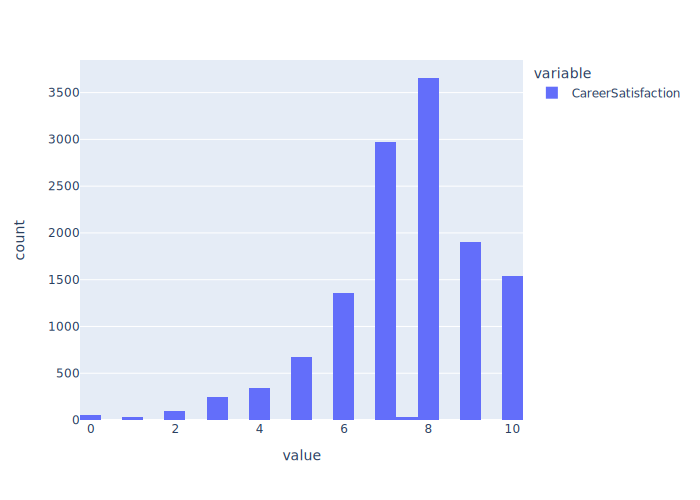

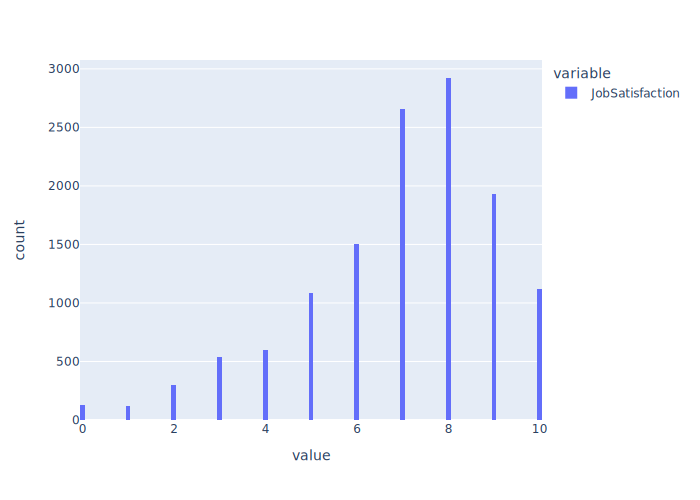

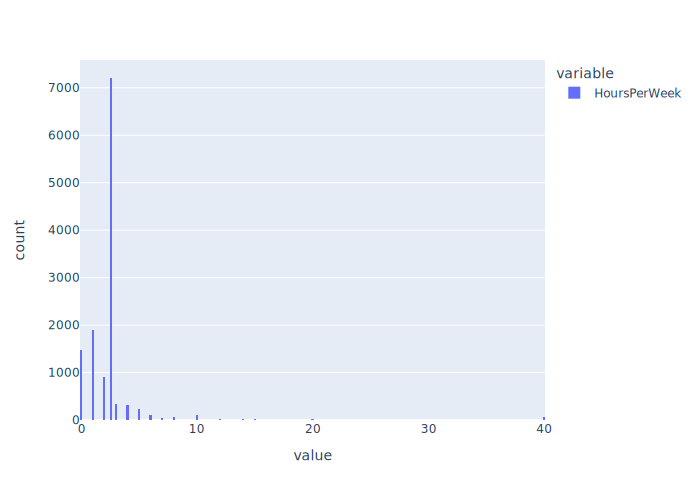

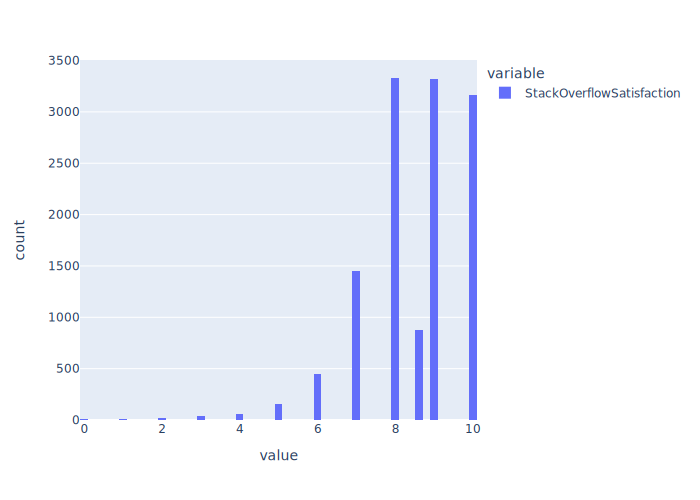

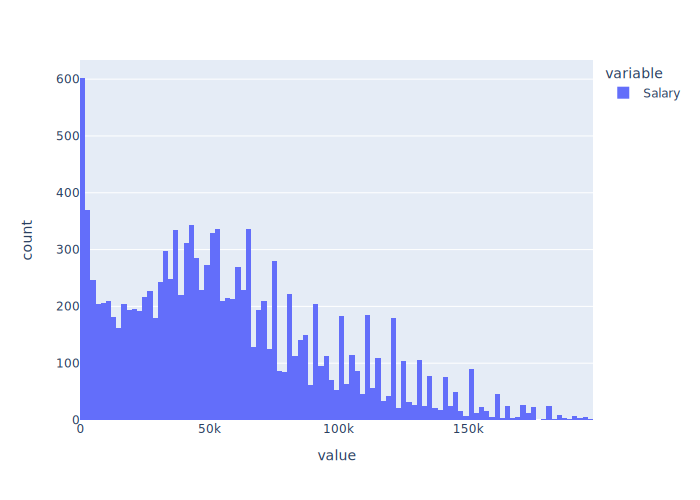

In [17]:
vars = df_num.columns
for i, var in enumerate(vars):
    fig = px.histogram(df_num[var])
    fig.show('svg')

From the distributions above we can see that the majority of developers make between 20k-80k a year, and many of them started programing as a hobby before programming as job. 
and the majority as well rate their career & job satisfaction more than 7/10   

exploring the currelation of the features with the salary

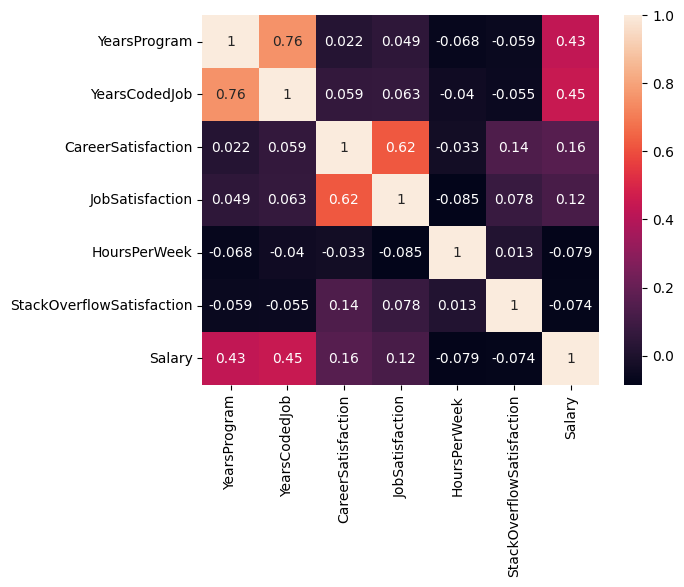

In [18]:
sn.heatmap(df_num.corr(), annot=True)
plt.show()

We can see that the salary is positively correlated with the years of experience & career satisfaction 

now lets handle categorical columns

In [19]:
df_cat = df_2.select_dtypes(include=['object'],exclude=['number']).reset_index(drop=True)

In [20]:
df_cat.head(2)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,Somewhat agree,Disagree,Somewhat agree,Agree,Disagree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,British pounds sterling (£),Neither underpaid nor overpaid,Spaces,Not very important,Self-taught; Coding competition; Hackathon; Op...,Official documentation; Trade book; Textbook; ...,NaN,NaN,9:00 AM,Java; PHP; Python,C; Python; Rust,NaN,NaN,MySQL,NaN,NaN,NaN,Sublime Text; Vim; IntelliJ,Turn on some music,Agile; Lean; Scrum; Extreme; Pair; Kanban,Mercurial,Multiple times a day,Agree,Disagree,Disagree,Agree,Agree,Disagree,Somewhat agree,Customer satisfaction; Benchmarked product per...,Very satisfied,Somewhat satisfied,Satisfied,Satisfied,Somewhat satisfied,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some influence,Some influence,Some influence,Some influence,Some influence,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Once

In [21]:
df_cat.shape

(12891, 145)

Since, since I have so many columns, I'll try a simple approach of selecting columns with less than 10% of it's record as null ( exclude columns with more than 10% percent null record ), because I want to reduce the complicity of my model and  retain as much information from the training set

In [22]:
x = 0.1
col_low_nulls = df_cat.isna().mean()[df_cat.isna().mean()<x]
Selected_columns = col_low_nulls.index.to_list()
df_cat = df_cat[Selected_columns]

In [23]:
df_cat.isna().sum()/len(df_cat)

Professional               0.000000
ProgramHobby               0.000000
Country                    0.000000
University                 0.000000
EmploymentStatus           0.000000
FormalEducation            0.000000
MajorUndergrad             0.071911
HomeRemote                 0.000621
CompanySize                0.000853
CompanyType                0.001784
DeveloperType              0.000155
PronounceGIF               0.000853
ClickyKeys                 0.014429
Currency                   0.069739
Overpaid                   0.002560
TabsSpaces                 0.036072
WorkStart                  0.061671
HaveWorkedLanguage         0.059189
IDE                        0.073462
AuditoryEnvironment        0.068187
StackOverflowDescribes     0.064774
StackOverflowDevices       0.089287
Gender                     0.091692
HighestEducationParents    0.092157
SurveyLong                 0.099682
dtype: float64

In [24]:
df_cat.head(2)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,DeveloperType,PronounceGIF,ClickyKeys,Currency,Overpaid,TabsSpaces,WorkStart,HaveWorkedLanguage,IDE,AuditoryEnvironment,StackOverflowDescribes,StackOverflowDevices,Gender,HighestEducationParents,SurveyLong
0,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,Other,"With a hard ""g,"" like ""gift""",Yes,British pounds sterling (£),Neither underpaid nor overpaid,Spaces,9:00 AM,Java; PHP; Python,Sublime Text; Vim; IntelliJ,Turn on some music,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Male,A professional degree,Somewhat agree
1,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",Publicly-traded corporation,Embedded applications/devices developer,"With a hard ""g,"" like ""gift""",No,British pounds sterling (£),Somewhat underpaid,Spaces,9:00 AM,Assembly; C; C++,Emacs; Xcode,Keep the room absolutely quiet,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Male,High school,Somewhat agree


my approach here is to fill the null values with dummies implying that the values are null,
then transform our categorical variables to be one-hot encoded, 

In [25]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [26]:
cat_cols_lst = df_cat.columns
df_cat2 = create_dummy_df(df_cat, cat_cols_lst, dummy_na=True)
Final_df = pd.concat([df_cat2,df_num],axis=1)
Final_df.head(2)

,Professional_nan,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",ProgramHobby_nan,Country_Albania,Country_Anguilla,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaidjan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bermuda,Country_Bolivia,Country_Bosnia-Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Cambodia,Country_Canada,Country_Cayman Islands,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guam,Country_Guatemala,Country_Guinea,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_I prefer not to say,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kuwait,Country_Kyrgyzstan,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Malta,Country_Martinique (French),Country_Mauritius,Country_Mexico,Country_Moldavia,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Caledonia (French),Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_North Korea,Country_Norway,Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Reunion (French),Country_Romania,Country_Russian Federation,Country_Saudi Arabia,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovak Republic,Country_Slovenia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_U.S. Minor Outlying Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Virgin Islands (USA),Country_Yemen,Country_Zaire,Country_Zimbabwe,Country_nan,University_No,"University_Yes, full-time","University_Yes, part-time",University_nan,EmploymentStatus_Employed part-time,EmploymentStatus_nan,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,FormalEducation_Some college/university study without earning a bachelor's degree,FormalEducation_nan,MajorUndergrad_A health science,MajorUndergrad_A humanities discipline,MajorUndergrad_A natural science,MajorUndergrad_A non-computer-focused engineering discipline,MajorUndergrad_A social science,MajorUndergrad_Computer engineering or electrical/electronics engineering,MajorUndergrad_Computer programming or Web development,MajorUndergrad_Computer science or software engineering,MajorUndergrad_Fine arts or performing arts,MajorUndergrad_I never declared a major,"MajorUndergrad_Information technology, networking, or system administration",MajorUndergrad_Management information systems,MajorUndergrad_Mathematics or statistics,MajorUndergrad_Psychology,MajorUndergrad_Something else,MajorUndergrad_nan,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half

here i'm choosing the salary as my target of prediction 

In [27]:
X = Final_df.drop(columns=['Salary'],axis=1)
y= Final_df['Salary']

shuffling and splitting the data for training and testing

In [28]:
X,y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaling the data to be inputted into the machine learning model

In [29]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train.values.reshape(-1,1))

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

y_train = y_scaler.transform(y_train.values.reshape(-1,1))
y_test = y_scaler.transform(y_test.values.reshape(-1,1))


the functions bellow are for training and evaluating the model

In [30]:
def train_model(model,X,y):
    model.fit(X=X, y=y)
    print("model score on training data",model.score(X,y))
    return model


def evaluate_model(model,X,y,y_scaler):
    preds = model.predict(X)
    score = r2_score(y, preds)
    print("The rsquared on the data was {}. ".format(score))

    plot = px.scatter(x=  y_scaler.inverse_transform(y.reshape(-1, 1)).flatten() 
                        , y=   y_scaler.inverse_transform(preds.reshape(-1, 1)).flatten() 
                        , title="Predictions")

    plot.update_traces(marker=dict(color="red"), mode="markers", name="Predictions")

    plot.add_scatter(x=y_scaler.inverse_transform(y.reshape(-1, 1)).flatten(),
                     y= y_scaler.inverse_transform(y.reshape(-1, 1)).flatten(),
                           mode="lines", name="Regression Line", line=dict(color="green"), showlegend=False)
    plot.update_layout(showlegend=False)
    plot.show("png")
    
    RMSE = math.sqrt(
            np.square(
                np.subtract(y_scaler.inverse_transform(y.reshape(-1, 1)),
                                                    y_scaler.inverse_transform(preds.reshape(-1, 1)))).mean())

    print(' RMSE:', RMSE)
    return score, RMSE


In [31]:
LR_model = train_model(LinearRegression(), X_train, y_train)

model score on training data 0.8891671057807997


The rsquared on the data was 0.8891671057807997. 


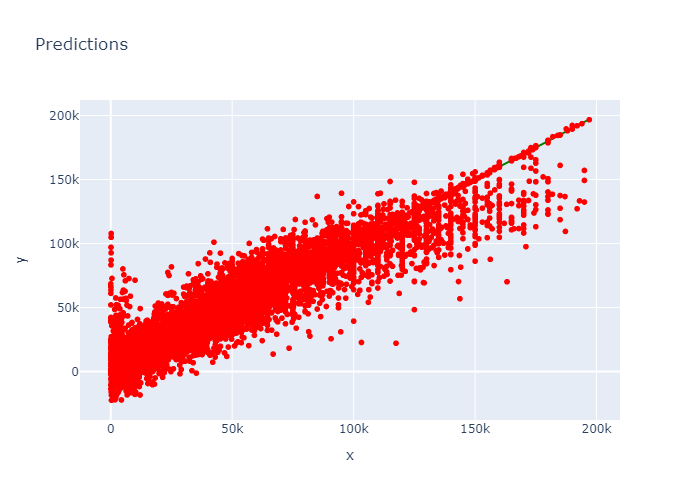

 RMSE: 13260.562540861312


In [32]:
_,_ = evaluate_model(LR_model,X_train,y_train,y_scaler)

In [33]:
parameters = {'alpha':[1e-3,1e-2,1e-1,5e-1, 1]}
ridge_model = train_model(GridSearchCV(estimator = Ridge(),param_grid=parameters,scoring='r2',return_train_score=True,cv=6), X_train, y_train)

model score on training data 0.8616778661075659


The rsquared on the data was 0.8616778661075659. 


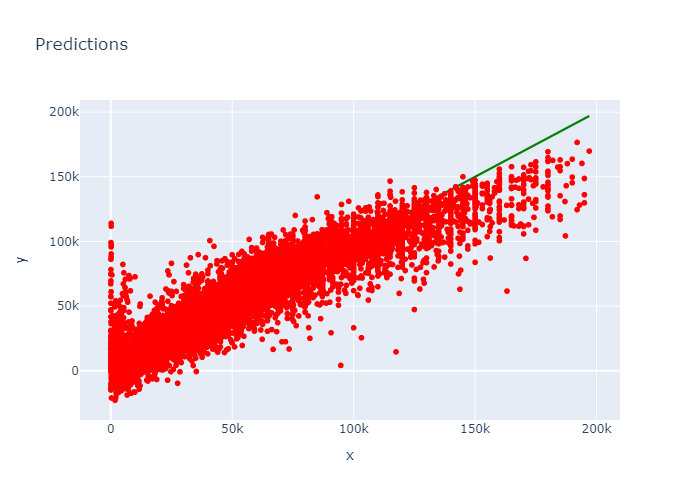

 RMSE: 14814.037889142715


In [34]:
_,_ = evaluate_model(ridge_model,X_train,y_train,y_scaler)

we can see that our models look promising during training, but we will explore them more while answering the real question (Q3) 

## Data analysis & Evaluation

## Question 1 : What are the general demographics of the developers in the market ? (EDA) 

px.histogram works as a bar chart for categorical axis 

- country

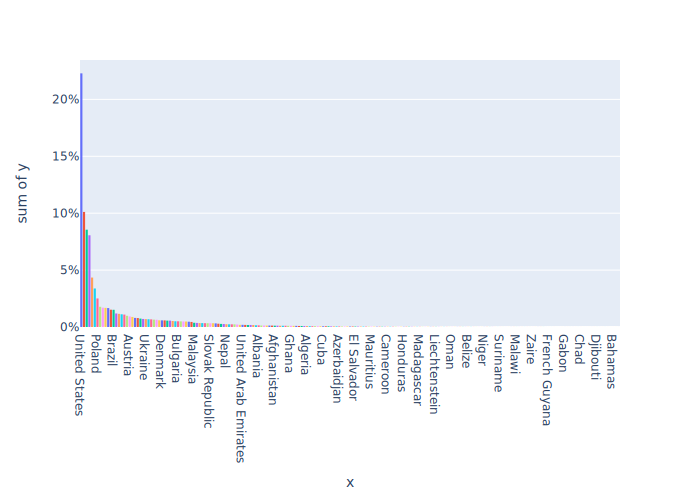

In [35]:
Countries = df.groupby('Country').count()['Respondent']/df['Respondent'].nunique()
Countries = Countries.sort_values(ascending = False)
fig = px.histogram(x = Countries.index, y =Countries*100,color=Countries.index )
fig.update_layout(showlegend=False,yaxis_ticksuffix = "%")
fig.show("svg")


#### Top 10 Countries : 

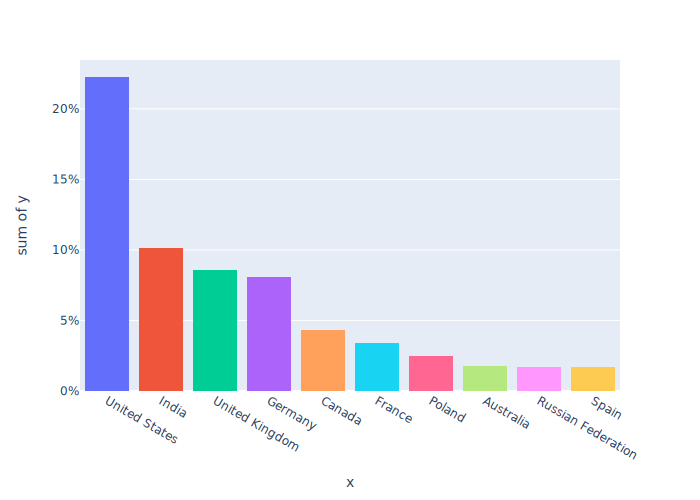

In [36]:
fig = px.histogram(x = Countries.index[0:10], y =Countries[0:10]*100 , color=Countries.index[0:10])
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_layout(showlegend=False,yaxis_ticksuffix = "%")
fig.show("svg")

### we can see here that the majority are from Northen america, India, & europ, lets explore the gender now 

- Gender

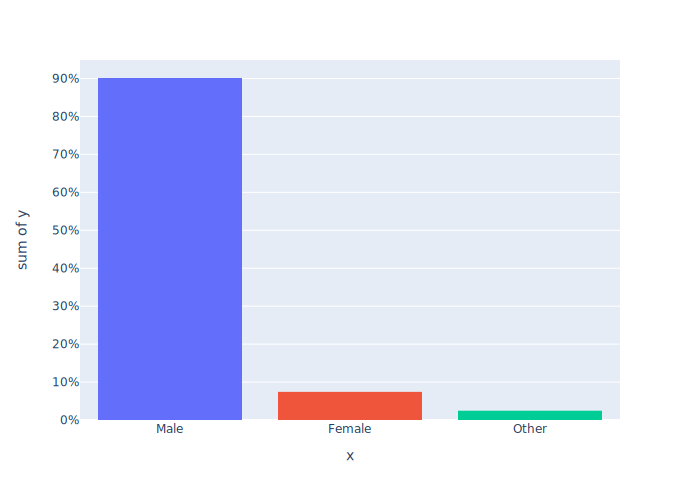

In [37]:
Gender  = df['Gender'].value_counts()/len(df['Gender'].dropna())
fig = px.histogram(x = Gender.index, y=Gender*100,color=Gender.index)
fig.update_layout(showlegend=False,yaxis_ticksuffix = "%")
fig.show("svg")

#### We can see that 90% of profesional devolopers are males, and only 7% are females, which is a huge difference

### Now lets explore the educational background of the respondents 
- education

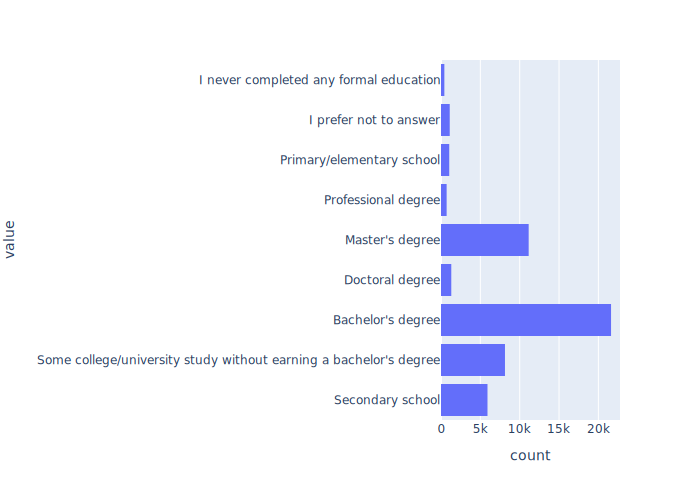

In [38]:
fig = px.histogram(df['FormalEducation'],orientation='h')
fig.update_layout(showlegend=False)
fig.show("svg")

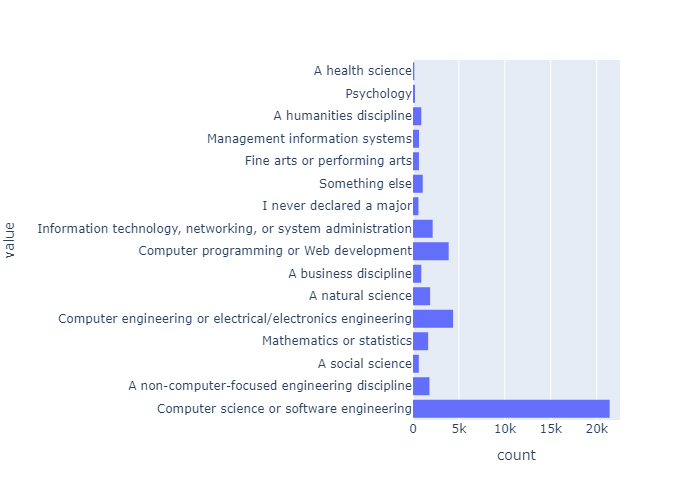

In [39]:
fig = px.histogram(df['MajorUndergrad'],orientation='h')
fig.update_layout(showlegend=False)
fig.show("png")

### We can see here that the majority of the respondents have pursue a college/university education, and most of them are stuying CS/SE 

## Question 2: Can we use the information provided by Q1 to explore the relationship between the demographics and an indivisuals salary? 

In [40]:
# dropping rows with no salary information 
df.dropna(subset=['Salary'],inplace=True)

#### we set the sample size "threshold" for the required amount of records to calculate an average, this is due to our dataset having a single or very few salary records per category


In [41]:
avg_threshold = 100

### We'll calculate and explore both the average and median salary per category, the median here is to ensure that our averaging is representative an not severaly affected by outliers

### - Average & median salary per country

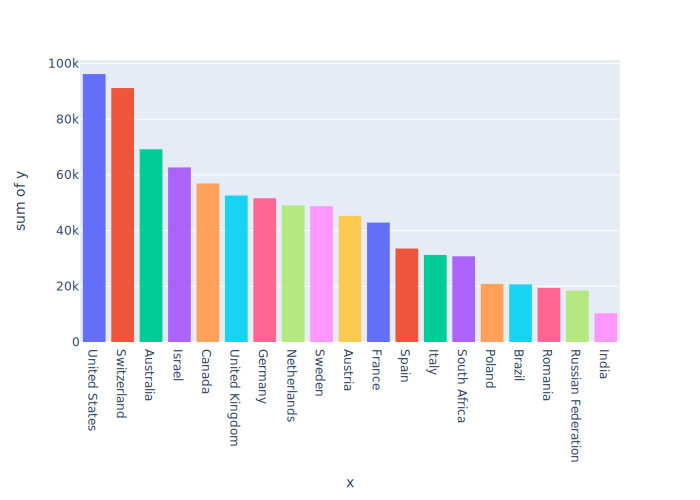

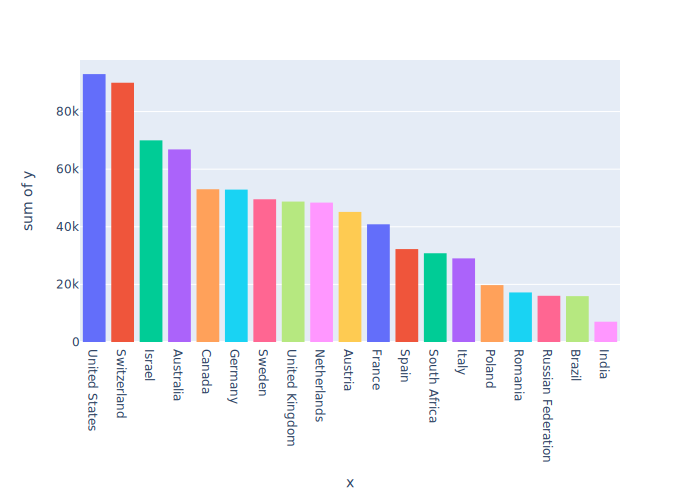

In [42]:
Countries = df.groupby('Country').count()['Respondent']
Countries = Countries[Countries >=avg_threshold]

Countries_Salary = df.groupby('Country').mean(numeric_only=True)['Salary'].sort_values(ascending = False)
Countries_Salary = Countries_Salary[Countries_Salary.index.isin(Countries.index)]

fig = px.histogram(x = Countries_Salary.index, y =Countries_Salary,color= Countries_Salary.index)
fig.update_layout(showlegend=False)
fig.show("svg")

Countries_Salary = df.groupby('Country').median(numeric_only=True)['Salary'].sort_values(ascending = False)
Countries_Salary = Countries_Salary[Countries_Salary.index.isin(Countries.index)]

fig = px.histogram(x = Countries_Salary.index, y =Countries_Salary ,color=Countries_Salary.index)
fig.update_layout(showlegend=False)
fig.show("svg")

### - Average & median salary per Gender

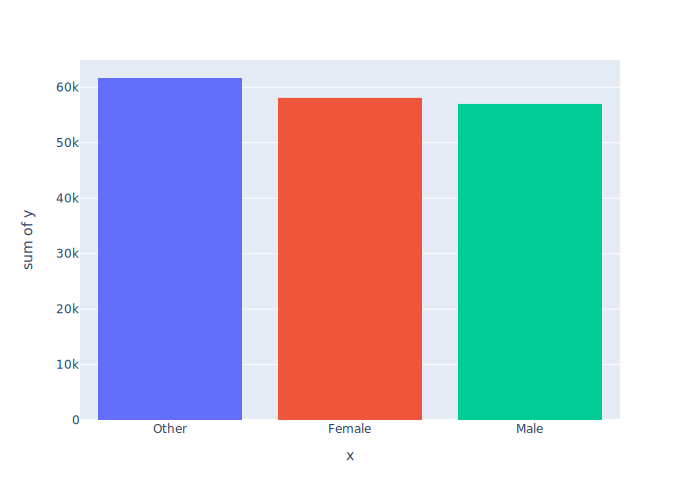

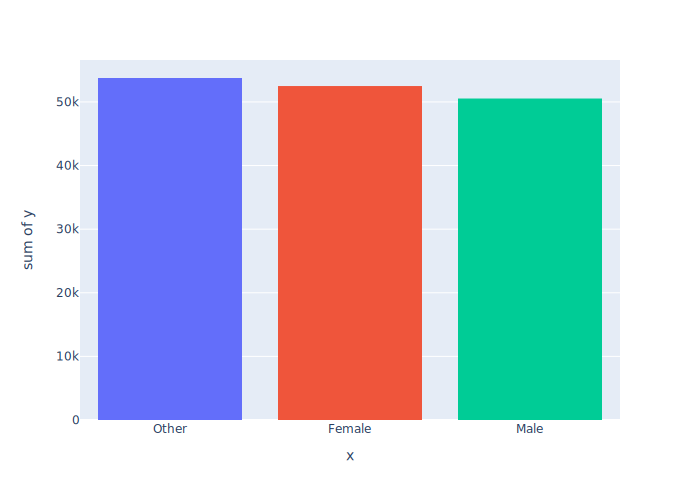

In [43]:
Genders = df.groupby('Gender').count()['Respondent']
Genders = Genders[Genders >=avg_threshold]

Gender_Salary = df.groupby('Gender').mean(numeric_only=True)['Salary'].sort_values(ascending = False)
Gender_Salary = Gender_Salary[Gender_Salary.index.isin(Genders.index)]

fig = px.histogram(x = Gender_Salary.index, y =Gender_Salary,color=Gender_Salary.index )
fig.update_layout(showlegend=False)
fig.show("svg")

Gender_Salary = df.groupby('Gender').median(numeric_only=True)['Salary'].sort_values(ascending = False)
Gender_Salary = Gender_Salary[Gender_Salary.index.isin(Genders.index)]

fig = px.histogram(x = Gender_Salary.index, y =Gender_Salary ,color=Gender_Salary.index)
fig.update_layout(showlegend=False)
fig.show("svg")

### - Average & median salary per Education

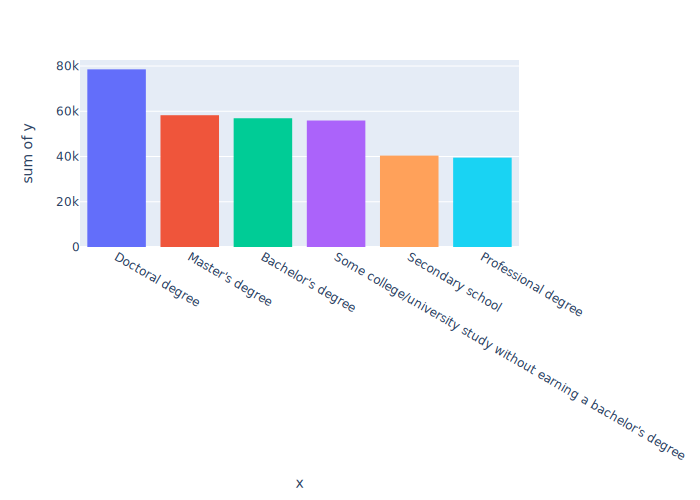

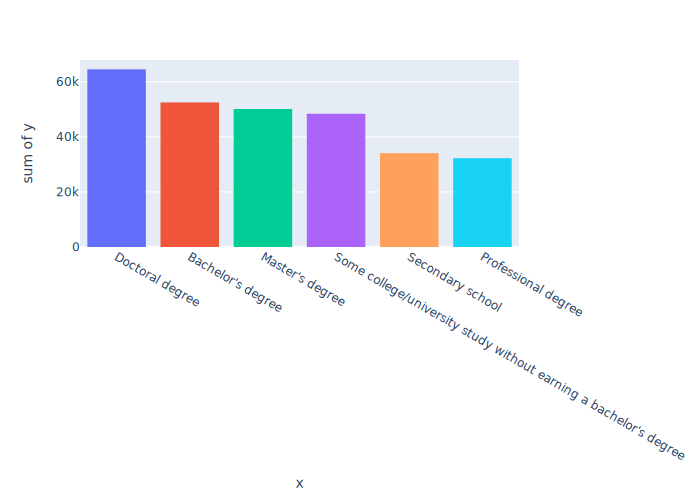

In [44]:
FormalEducation = df.groupby('FormalEducation').count()['Respondent']
FormalEducation = FormalEducation[FormalEducation >=avg_threshold]

FormalEducation_Salary = df.groupby('FormalEducation').mean(numeric_only=True)['Salary'].sort_values(ascending = False)
FormalEducation_Salary = FormalEducation_Salary[FormalEducation_Salary.index.isin(FormalEducation.index)]

fig = px.histogram(x = FormalEducation_Salary.index, y =FormalEducation_Salary,color= FormalEducation_Salary.index)
fig.update_layout(showlegend=False)
fig.show("svg")

FormalEducation_Salary = df.groupby('FormalEducation').median(numeric_only=True)['Salary'].sort_values(ascending = False)
FormalEducation_Salary = FormalEducation_Salary[FormalEducation_Salary.index.isin(FormalEducation.index)]

fig = px.histogram(x = FormalEducation_Salary.index, y =FormalEducation_Salary,color=FormalEducation_Salary.index )
fig.update_layout(showlegend=False)
fig.show("svg")

From the data above we can say that developers from USA, Switzerland, Australia get paid the most, while developers from India, Brazil, and Russian Federation get paid the least. 

We can also see that female devolopers get paid slightly more than male developers. 
And PHD holding developers get paid the highest which is about 20% more than Masters & Bachelors holders which have very close payrange.   

## Question 3: Given the output from Q1 & Q2, can we predict/estimate ones salary based on the provided data & a selected set of features ? 

as we saw above, both the liear regression and ridge regression models preform well on training data which is a good indicator to answering this section, but we also need to explore how our models behave on testing (unseen) data 

Lets evaluate the Linear Regression model :

The rsquared on the data was -5.155494753091085e+23. 


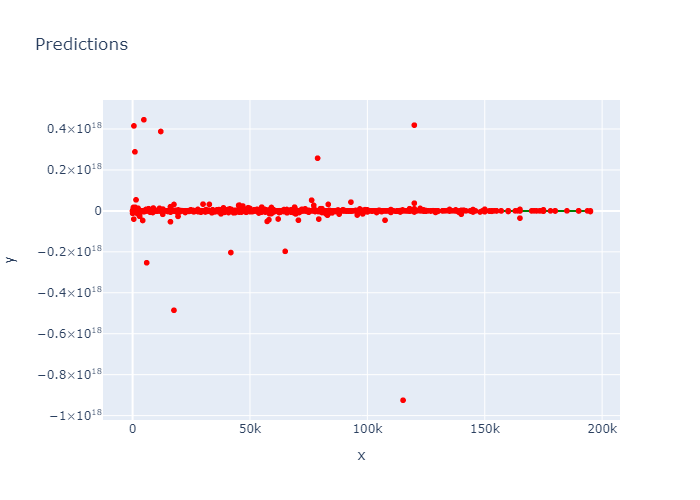

 RMSE: 2.876795424430827e+16


In [45]:
_,_ = evaluate_model(LR_model,X_test,y_test,y_scaler)

We can see that our LR model overfits the data and this could happen do to various reasons such as the large number of features, non-linearity, etc...

Now lets evaluate the Ridge regression model 

The rsquared on the data was 0.7216088541902781. 


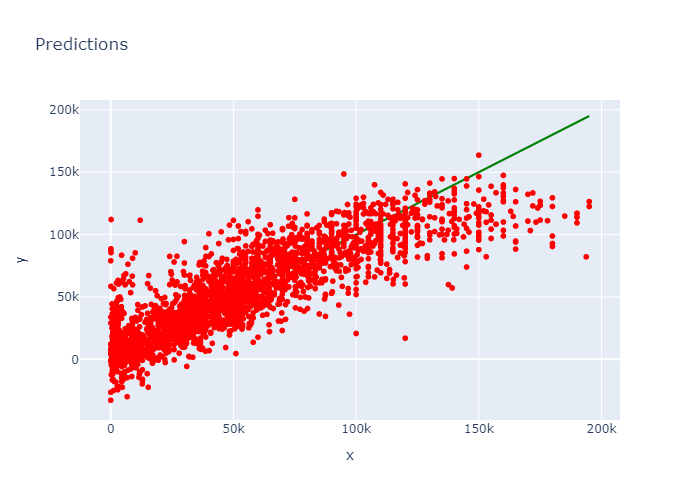

 RMSE: 21139.83114022827


In [46]:
_,_ = evaluate_model(ridge_model,X_test,y_test,y_scaler)

we can see that this model isnt perfect but it performs much better than linear regression do to it's regularization to prevent overfitting 

a much better model can be obained using more feature engineering, different regression algorithm, hyperparameter gridsearch, and crossvalidation. 